In [38]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import random
import multiprocessing
import nltk
from nltk.tokenize import sent_tokenize
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tag import pos_tag
from nltk.text import Text
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

In [2]:
def getwords(file):
    review_5 = []
    with open(file, 'r') as f:
        data = json.load(f)
        for i in data:
            review_5.append(i['text'])
            
    sent=[]
    for i in review_5:
        sent.append(sent_tokenize(i))
        
    words=[]
    for i in sent:
        for j in i:
            words.extend(word_tokenize(j))
            
    words_lower=[i.lower()for i in words]
    
    english_stopwords=stopset = set(stopwords.words('english')) - set(('over', 'under', 'below', 'more', 'most', 'no', 'not', 'only', 'such', 'few', 'so', 'too', 'very', 'just', 'any', 'once'))
    english_punctions=[',','.',':',';','?','(',')','[',']','!','@','#','%','*','&','...']
    words_clear=[]
    for i in words_lower:
        if i not in english_stopwords:
            if i not in english_punctions:
                words_clear.append(i)
        
    st=PorterStemmer()
    words_stem=[st.stem(word)for word in words_clear]
    
    return words_stem


In [3]:
def getCommonWords(words_stem):
    ADJ=[]
    NOUN=[]
    for a,b in pos_tag(words_stem,tagset='universal'):
        if b=='NOUN':
            NOUN.append(a)
        elif b=='ADJ': 
            ADJ.append(a)

    cADJ = Counter(ADJ)

    cNOUN = Counter(NOUN)
    
    return cADJ,cNOUN


In [63]:
bad_mask = np.array(imread("thumb_down.png"))
good_mask = np.array(imread("thumb_up.png"))

/Users/wangfei/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/wangfei/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [64]:
def cloudGraph(counter,mask):
    
    stopwords = set(STOPWORDS)

    cloud = wordcloud.WordCloud(background_color="white",stopwords=stopwords, mask=mask)
    frequencies = dict(counter.most_common(1000))
    cloud.fit_words(frequencies)


    plt.figure(figsize=(12,10)) 
    image_colors = wordcloud.ImageColorGenerator(mask)
    plt.imshow(cloud.recolor(color_func=image_colors),interpolation="bilinear")

    plt.axis("off") 
    plt.show()

In [5]:
words_stem_5 = getwords('review_sample_5.json')

In [8]:
cADJ_5,cNOUN_5 = getCommonWords(words_stem_5)

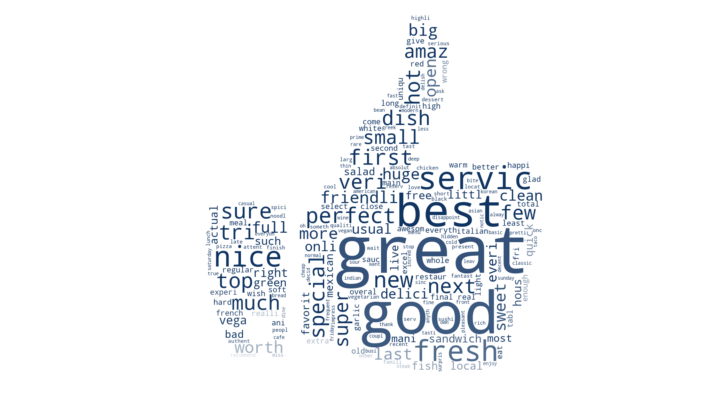

In [65]:
cloudGraph(cADJ_5,good_mask)

In [10]:
words_stem_1 = getwords('review_sample_1.json')

In [11]:
cADJ_1,cNOUN_1 = getCommonWords(words_stem_1)

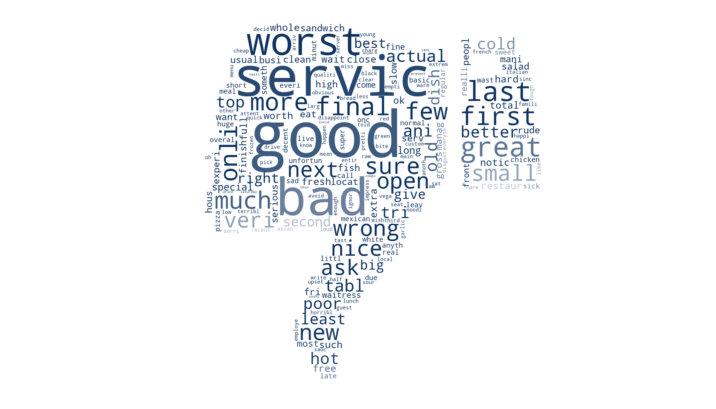

In [66]:
cloudGraph(cADJ_1,bad_mask)

In [13]:
for i in dict(cADJ_5.most_common(50)).keys():
    if i in dict(cADJ_1.most_common(50)).keys():
        print(i)
        word_text_1 = Text(words_stem_1)
        print("negative")
        word_text_1.concordance(i,lines = 1)
        print("positive")
        word_text_5 = Text(words_stem_5)
        word_text_5.concordance(i,lines = 1)
        print("\n")

great
negative
Displaying 1 of 6038 matches:
 was..now more tske home compens not great dinner..din experi guess u r look ba
positive
Displaying 1 of 29389 matches:
h hot delici daili ice cream special great perk employe nice fast accur 've reg


good
negative
Displaying 1 of 16376 matches:
e twice locat desert ridg first time good last time veri disappoint order pepp
positive
Displaying 1 of 23305 matches:
look good authent chines food care craft tri p


best
negative
Displaying 1 of 3147 matches:
 servic rate neg 5 star food mediocr best town wed confirm 7:30 reserv 8 june 
positive
Displaying 1 of 14083 matches:
 good alway like atmospher well hand best rib best wing fri die cornbread fres


servic
negative
Displaying 1 of 24493 matches:
overs..youl happi incred disappoint servic mean realli realli bad place order 
positive
Displaying 1 of 18014 matches:
ay come back food consist veri good servic server manag veri friendli veri pro


fresh
negative
Displaying 1 of 2465 matches:
er p